In [3]:
from rdflib import Graph 
from rdflib.namespace import RDF, OWL
from rdflib.term import URIRef
import pprint
import networkx as nx
import matplotlib.pyplot as plt
import random

g = Graph()
#g.parse("resources/SpeckledBand.ttl", format="turtle");
g.parse("resources/SpeckledBand_noOntology.ttl", format="turtle");

In [ ]:
def get_degrees(g):
    degrees = {}
    for subj in g.subjects():
        d = len(list(g.predicate_objects(subject=subj)))
        degrees[subj] = d
    return degrees

def stripURI(x):
    return x.split("/")[-1]

In [12]:
# Remove the unwanted triples
forbidden_edges = [
    URIRef("http://www.w3.org/2000/01/rdf-schema#label"),
    URIRef("http://www.w3.org/1999/02/22-rdf-syntax-ns#type"),
    URIRef("http://kgc.knowledge-graph.jp/ontology/kgc.owl#source"),
    URIRef("http://kgc.knowledge-graph.jp/ontology/kgc.owl#source")
]
# cannot just remove these triples, also need to remove triples which follow it
for e in forbidden_edges:
    g.remove((None, e, None))

In [6]:
# Remove nodes of very low degree
degrees = get_degrees(g)
lowDegreeNodes = []
for k in degrees:
    d = degrees[k]
    if d < 4:
        lowDegreeNodes.append(k)
for n in lowDegreeNodes:
    g.remove((None, None, n))
    g.remove((n, None, None))

# Random Walk

## Random Walk Visualisation

In [23]:
# Graph a random walk
%matplotlib qt
WALK_LENGTH = 10
subjs = list(g.subjects())
randomWalkGraph = nx.DiGraph()
edgeLabels = {}
plt.clf() # need this if using %matplotlib qt 

currentNode = random.choice(subjs)
currentNode_strip = stripURI(currentNode)
for i in range(WALK_LENGTH):
    # choose a random edge
    preds_objs = list(g.predicate_objects(subject = currentNode))
    if len(preds_objs) == 0: # nowhere to go, end walk
        break
    pred, obj = random.choice(preds_objs)
    pred_strip, obj_strip = stripURI(pred), stripURI(obj)
    print(currentNode_strip, pred_strip, obj_strip)
    randomWalkGraph.add_edge(currentNode_strip, obj_strip)
    edgeLabels[(currentNode_strip, obj_strip)] = pred_strip
    
    currentNode = obj
    currentNode_strip = stripURI(currentNode)

pos = nx.spring_layout(randomWalkGraph)
nx.draw_networkx(randomWalkGraph, pos=pos)
nx.draw_networkx_edge_labels(randomWalkGraph, pos=pos, edge_labels=edgeLabels)
plt.show()
# sometimes freaks out when it tries to render kanji/hirigana/katakana
    

44 kgc.owl#subject bedroom_of_Julia


### Example of  Random Walk
![yeet](resources/Figure_1.png)

## Random Walk with Analytics

In [7]:
def random_walk(g, walk_length):
    '''
        Performs random walk over rdflib graph. Returns 2-tuple of lists (nodes_traversed, edges_traversed)
        g::rdflib graph 
        walk_length::positive_int
    '''
    subjs = list(g.subjects())
    currentNode = random.choice(subjs)
    nodes_traversed = [currentNode]
    edges_traversed = [] 
    for i in range(walk_length):
        preds_objs = list(g.predicate_objects(subject = currentNode))
        if len(preds_objs) == 0: # nowhere to go, end walk
            break
        pred, obj = random.choice(preds_objs)
        nodes_traversed.append(obj)
        edges_traversed.append(pred)
        currentNode = obj
    return (nodes_traversed, edges_traversed)    

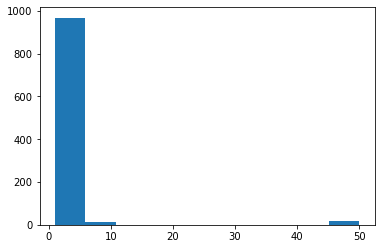

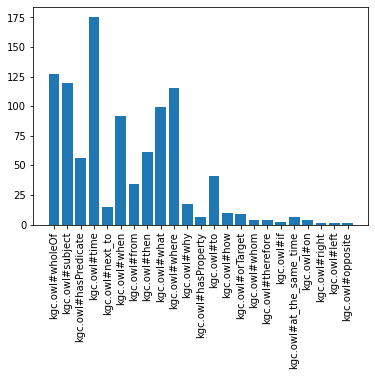

In [15]:
walk_lengths = []
final_edges = {}
for x in range(1000):
    rw_nodes, rw_edges = random_walk(g, 50)
    walk_lengths.append(len(rw_edges))
    
    final_edge = stripURI(rw_edges[-1])
    if final_edge in final_edges:
        final_edges[final_edge] += 1
    else:
        final_edges[final_edge] = 1

# histogram of walk lengths    
num_bins = 10
fig, ax = plt.subplots()
n, bins, patches = ax.hist(walk_lengths, num_bins)
plt.show()

# distribution of final edges
%matplotlib inline
x = final_edges.keys()
y = [final_edges[i] for i in x]
plt.xticks(rotation='vertical')
plt.bar(x,y)
plt.show()

In [ ]:
# Show all show all edges which are encoded with "Then"
thenG = nx.DiGraph()
for s, p, o in g.triples((None,
    URIRef("http://kgc.knowledge-graph.jp/ontology/kgc.owl#then"),
    None)): 
    # Idea: do query to get better node names
    # get_label
    # THIS DOES NOT WORK --- dw about it
    print(list(g.subjects(object=s, predicate=URIRef("http://www.w3.org/2000/01/rdf-schema#label"))))
    print(list(g.objects(subject=o, predicate=URIRef("http://www.w3.org/2000/01/rdf-schema#label"))))
    thenG.add_edge(stripURI(s_label), stripURI(o_label))
    

%matplotlib qt
nx.draw_networkx(thenG)
plt.show()

In [10]:
# For finding predicate URIs
for p in g.predicates():
    print(p)

http://www.w3.org/2000/01/rdf-schema#label
http://kgc.knowledge-graph.jp/ontology/kgc.owl#source
http://kgc.knowledge-graph.jp/ontology/kgc.owl#source
http://kgc.knowledge-graph.jp/ontology/kgc.owl#source
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.w3.org/2000/01/rdf-schema#label
http://kgc.knowledge-graph.jp/ontology/kgc.owl#time
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://kgc.knowledge-graph.jp/ontology/kgc.owl#source
http://kgc.knowledge-graph.jp/ontology/kgc.owl#source
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://kgc.knowledge-graph.jp/ontology/kgc.owl#subject
http://kgc.knowledge-graph.jp/ontology/kgc.owl#where
http://kgc.knowledge-graph.jp/ontology/kgc.owl#time
http://kgc.knowledge-graph.jp/ontology/kgc.owl#s

# Various Graph Analytics

1.89501312335958


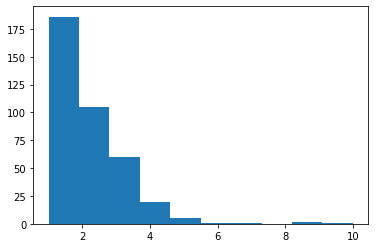

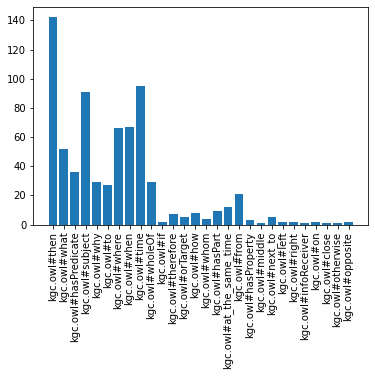

In [26]:
# Various Graph statistics
degrees = get_degrees(g)
total_d = sum(degrees.values())
avg_d = total_d / len(degrees)
print(avg_d)
# plot degrees
%matplotlib inline
num_bins = 10
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(degrees.values(), num_bins)
plt.show()

# Let's see what the distribution of edge types are like
twoEdges = {}
for node in degrees:
    if True: #degrees[node] == 2:
        edges = g.predicates(subject=node)
        for e in edges:
            edge = stripURI(e)
            if edge in twoEdges.keys():
                twoEdges[edge] += 1
            else:
                twoEdges[edge] = 1
x = list(twoEdges.keys())
y = [twoEdges[i] for i in x]
plt.xticks(rotation='vertical')
plt.bar(x,y)
plt.show()



# most nodes are have "type" ad "label" attached to them, which makes sense.